In [1]:
!pip install tensorflow pandas numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: keras
    Found existing installation: keras 3.2.1
    Uninstalling keras-3.2.1:
      Successfully uninstalled keras-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [2]:
!pip install keras

In [3]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf

2024-06-25 09:01:51.534850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 09:01:51.534957: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 09:01:51.662389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
np.expand_dims??

Signature:       np.expand_dims(a, axis)
Call signature:  np.expand_dims(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function expand_dims at 0x7dc91c147d00>
File:            /opt/conda/lib/python3.10/site-packages/numpy/lib/shape_base.py
Source:         
@array_function_dispatch(_expand_dims_dispatcher)
def expand_dims(a, axis):
    """
    Expand the shape of an array.

    Insert a new axis that will appear at the `axis` position in the expanded
    array shape.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int or tuple of ints
        Position in the expanded axes where the new axis (or axes) is placed.

        .. deprecated:: 1.13.0
            Passing an axis where ``axis > a.ndim`` will be treated as
            ``axis == a.ndim``, and passing ``axis < -a.ndim - 1`` will
            be treated as ``axis == 0``. This behavior is deprecated.

        .. versionchanged:: 1.18.0
            A tuple of axes is now s

In [5]:
df = pd.read_csv("/kaggle/input/toxic-comment-classification/train.csv/train.csv")

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(159571, 8)

In [9]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df[df.columns[2:]].iloc[0]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 0, dtype: int64

# 1. PREPROCESSING: 

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
TextVectorization??

Init signature:
TextVectorization(
    max_tokens=None,
    standardize='lower_and_strip_punctuation',
    split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,
    pad_to_max_tokens=False,
    vocabulary=None,
    idf_weights=None,
    sparse=False,
    ragged=False,
    encoding='utf-8',
    **kwargs,
)
Source:        
@keras_export(
    "keras.layers.TextVectorization",
    "keras.layers.experimental.preprocessing.TextVectorization",
    v1=[],
)
class TextVectorization(base_preprocessing_layer.PreprocessingLayer):
    """A preprocessing layer which maps text features to integer sequences.

    This layer has basic options for managing text in a Keras model. It
    transforms a batch of strings (one example = one string) into either a list
    of token indices (one example = 1D tensor of integer token indices) or a
    dense representation (one example = 1D tensor of float values representing
    data about the example's tokens). This layer is 

In [13]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [14]:
X.head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [15]:
y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [16]:
MAX_FEATURES = 100000 #Max no of words vectorized

In [17]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                              output_sequence_length = 1800, 
                              output_mode = 'int')
#output sequence length to cap lenghth of tokenizing words
#output mode is ki what will be the type of token value

In [18]:
vectorizer.adapt(X.values)
#creating vectors for our values inside dataframe

In [19]:
vectorizer.get_vocabulary()
#to see our vocabulary

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [20]:
# vectorizer('Hello world ,This is Yash') #to return all values 
vectorizer('Hello world ,This is Yash')[:5] #return first 5 values nof our vector

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([  288,   263,    14,     9, 68895])>

In [21]:
vectorized_text = vectorizer(X.values)
#create a vectorized text for our dataset

In [22]:
vectorized_text


<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

# **PIPELINING**

## MCSHBAP : MAP,CACHE,SHUFFLE,BATCH,PREFETCH(For pipelining)

In [23]:
# two ways to create dataset : .from_tensor_slices or .list_files

In [24]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps prevent bottleneck

In [25]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [26]:
batch_X

array([[  14,   25,   92, ...,    0,    0,    0],
       [2119, 8307,    4, ...,    0,    0,    0],
       [  23,    8,   86, ...,    0,    0,    0],
       ...,
       [  11,   57,  193, ...,    0,    0,    0],
       [1144,  733,   14, ...,    0,    0,    0],
       [ 451, 6188, 3646, ...,    0,    0,    0]])

In [27]:
len(dataset) #return number of batches not total values

9974

In [28]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [29]:
train_generator = train.as_numpy_iterator()

In [30]:
train_generator.next() # what it does is get the iterator to a batch and perform what we need to do
#when in model it does foward and backward pass update gradients then gets to next BATCH

(array([[ 292,  115,  465, ...,    0,    0,    0],
        [ 171,   94,   13, ...,    0,    0,    0],
        [  11,    2, 2398, ...,    0,    0,    0],
        ...,
        [3662,   36,   44, ...,    0,    0,    0],
        [  90,    7,   33, ...,    0,    0,    0],
        [1347, 1930, 1260, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# SEQUENTIAL MODEL

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout ,Bidirectional,Dense,Embedding
import keras
# from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32,activation = 'tanh')))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(256,activation = 'relu'))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(6,activation = 'sigmoid'))

In [33]:
# loss_func = Binarycrossentropy()
model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),optimizer = 'Adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          3200032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [35]:
history = model.fit(train,epochs = 5,validation_data = val)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
I0000 00:00:1719306150.808907     114 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2997/6981 [===========>..................] - ETA: 6:45 - loss: 0.0751

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



3732/6981 [===============>..............] - ETA: 3:57 - loss: 0.0466

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6981/6981 [==============================] - 569s 82ms/step - loss: 0.0417 - val_loss: 0.0379
Epoch 4/5
6981/6981 [==============================] - 575s 82ms/step - loss: 0.0379 - val_loss: 0.0335
Epoch 5/5
6981/6981 [==============================] - 570s 82ms/step - loss: 0.0340 - val_loss: 0.0288


In [36]:
history.history

{'loss': [0.0629059225320816,
  0.04644012451171875,
  0.041665710508823395,
  0.03787299618124962,
  0.033954739570617676],
 'val_loss': [0.05186530947685242,
  0.041679441928863525,
  0.03792447969317436,
  0.03348897024989128,
  0.028789229691028595]}

In [37]:
from matplotlib  import pyplot as plt

<Figure size 800x500 with 0 Axes>

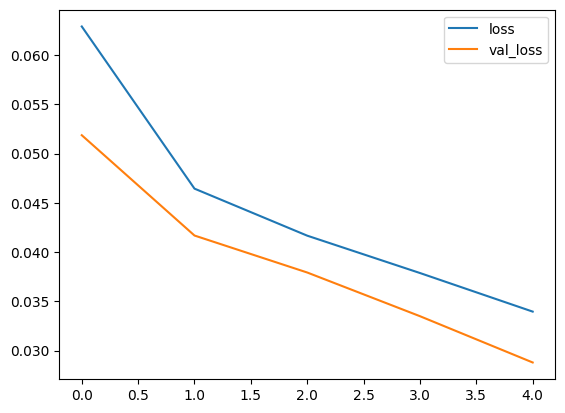

In [38]:
plt.figure(figsize = (8,5))
pd.DataFrame(history.history).plot()
plt.show()

# MAKING PREDICTIONS:

In [39]:
input_text = vectorizer("you totally suck! You bitch")

In [40]:
# model.predict(input_text)
## gives error because our model takes batches as inputs what we are inputting a single value
model.predict(np.array([input_text])) #works

1/1 [==============================] - 1s 814ms/step


array([[0.9997552 , 0.49452168, 0.99652535, 0.01199595, 0.9236944 ,
        0.04233783]], dtype=float32)

In [41]:
# Or we can even do the following
res = model.predict(np.expand_dims(input_text,0))
res

1/1 [==============================] - 0s 48ms/step


array([[0.9997552 , 0.49452168, 0.99652535, 0.01199595, 0.9236944 ,
        0.04233783]], dtype=float32)

In [42]:
test_X,test_y = test.as_numpy_iterator().next()

In [43]:
test_X[5]

array([45496,     1,   596, ...,     0,     0,     0])

In [44]:
(model.predict(test_X) >0.5).astype(int)

1/1 [==============================] - 0s 47ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [45]:
test_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# EVALUATING THE MODEL

In [46]:
from tensorflow.keras.metrics import Precision , Recall, Accuracy

In [47]:
precision = Precision()
recall = Recall()
acc = Accuracy

In [48]:
for batch in test.as_numpy_iterator():
    X_true ,y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    precision.update_state(y_true,yhat)
    recall.update_state(y_true,yhat)
#     acc.update_state(y_true,yhat)

# Task See catAcc ka usage

1/1 [==============================] - 0s 53ms/step


In [49]:
print(f' precsion is {precision.result().numpy()} and recall is {recall.result().numpy()}')

 precsion is 0.8753308057785034 and recall is 0.8039427399635315
